In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy.stats import ttest_ind, ttest_1samp, ttest_rel

pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv('./data/qwantify.csv')

In [11]:
df.head()

,startTime_ISO8601,startTime_secondsSinceMidnight1Jan1970UTC,estimatedSecondsSinceAlert,wantingAnything,whatWanting,wantingIntensity,wantedToFeel_control,wantedToFeel_lessStress,wantedToFeel_goodAboutMe,wantedToFeel_connected,wantedToFeel_comfort,wantedToFeel_novelty,wantedToFeel_calm,wantedToFeel_health,wantedToFeel_energy,wantedToFeel_goodPerson,wantedToFeel_competent,wantedToFeel_acknowledged,wantedToFeel_helpful,wantedToFeel_other,wantedToFeel_specifiedOther,wantedToFeel_nothingInParticular,doing,doing_specifiedOther,withOthers,feelingBadToGood,energy,physically_good,physically_energized,physically_hungry,physically_tired,physically_uncomfortable,physically_other,physically_specifiedOther,physically_noFeeling,feeling_angry,feelingIntensity_angry,feeling_anxious,feelingIntensity_anxious,feeling_awe,feelingIntensity_awe,feeling_content,feelingIntensity_content,feeling_frustrated,feelingIntensity_frustrated,feeling_grateful,feelingIntensity_grateful,feeling_happy,feelingIntensity_happy,feeling_jealous,feelingIntensity_jealous,feeling_loving,feelingIntensity_loving,feeling_proud,feelingIntensity_proud,feeling_restless,feelingIntensity_restless,feeling_sad,feelingIntensity_sad,feeling_other,feeling_specifiedOther,feeling_noEmotion,thinkingOverAndOver,comparingToOthers,lonely,selfWorth,appreciating,stressed
0,2017-05-02T20:11:01-07:00,1493781061,2351.0,2,Work on data project,0.494,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,talk,NaN,2,0.633,0.771,0,0,1,0,0,0,NaN,0,0,NaN,0,NaN,0,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,0.000,NaN,0.0,0.629,0.000,0.000
1,2017-05-02T12:41:30-07:00,1493754090,2354.0,2,Apply to jobs,0.281,0,0,1,0,0,0,0,0,0,0,0,0,0,0,NaN,0,chores,NaN,0,0.506,0.629,0,0,0,0,0,0,NaN,1,0,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,NaN,0,NaN,0,NaN,0,0.426,NaN,0.0,0.500,0.000,0.104
2,2017-05-02T08:34:34-07:00,1493739274,7.0,2,Paint the stairs,0.283,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,other,Meditating,0,0.500,0.502,0,0,0,0,1,0,NaN,0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,0.175,NaN,0.0,0.363,0.000,0.289
3,2017-05-01T21:34:24-07:00,1493699664,4591.0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,other,Dancing,2,0.633,0.500,0,0,1,0,0,0,NaN,0,0,NaN,0,NaN,0,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,0.000,NaN,0.0,0.514,0.791,0.000
4,2017-05-01T15:49:41-07:00,1493678981,8616.0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,other,Looking for a job,0,0.500,0.500,0,0,0,0,0,0,NaN,1,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,0.000,NaN,0.0,0.502,0.000,0.143


In [12]:
continuous_cols = ['wantingIntensity','feelingBadToGood','energy', 'thinkingOverAndOver','lonely','selfWorth','appreciating','stressed']


In [79]:
dfc = df[['wantingAnything'] + continuous_cols]
dfw = df[df['wantingAnything']==2]

## Explore the conditions that correspond with high levels of intensity of want and stress?

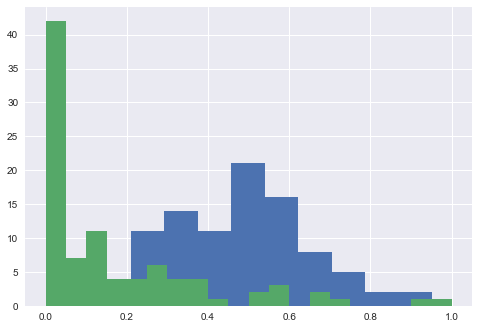

In [33]:
want_vals = dfc[dfc['wantingAnything']==2].ix[:, 'wantingIntensity'].values
stress_vals = dfc[dfc['wantingAnything']==2].ix[:, 'stressed'].values

plt.hist(want_vals, bins=10);
plt.hist(stress_vals, bins=20);

In [45]:
print np.mean(want_vals)
print np.std(want_vals)
want_vals[np.where(want_vals > (np.mean(want_vals) + np.std(want_vals)))]

0.479548387097
0.172094592402


array([ 0.735,  0.851,  0.669,  0.715,  0.918,  0.689,  0.952,  0.859,
        0.731,  0.723,  0.669,  0.695,  0.675,  0.661,  0.747])

In [74]:
df_high_stress = dfc[(dfc['wantingAnything']==2) & \
    (dfc['wantingIntensity'] > (np.mean(want_vals))) & \
    (dfc['stressed'] > (np.median(stress_vals)))]

df_low_stress = dfc[(dfc['wantingAnything']==2) & \
    (dfc['wantingIntensity'] > (np.mean(want_vals))) & \
    (dfc['stressed'] < (np.median(stress_vals)))]

**How does energy level vary with stress when want intensity is high?**

In [67]:
print 'Using Mean Stressed Values'
print 'High Want Intensity, Low Stress, mean energy level:',np.mean(df_low_stress.energy.values)
print 'High Want Intensity, High Stress, mean energy level:',np.mean(df_high_stress.energy.values)

print '\n',ttest_ind(a=df_low_stress.energy.values, b=df_high_stress.energy.values)

High Want Intensity, Low Stress, mean energy level: 0.661176470588
High Want Intensity, High Stress, mean energy level: 0.477

Ttest_indResult(statistic=3.5639634858974816, pvalue=0.00086449239407089052)


In [75]:
print 'Using Median Stressed Values'
print 'High Want Intensity, Low Stress, mean energy level:',np.mean(df_low_stress.energy.values)
print 'High Want Intensity, High Stress, mean energy level:',np.mean(df_high_stress.energy.values)

print '\n',ttest_ind(a=df_low_stress.energy.values, b=df_high_stress.energy.values)

Using Median Stressed Values
High Want Intensity, Low Stress, mean energy level: 0.664666666667
High Want Intensity, High Stress, mean energy level: 0.512111111111

Ttest_indResult(statistic=3.0522573892036644, pvalue=0.0037660749715205328)


plot Stress vs. Energy (for high want intensity)

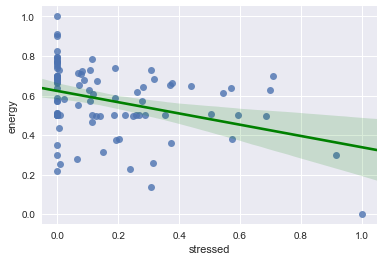

In [86]:
sns.regplot(x=dfw.stressed, y=dfw.energy, line_kws={'color':'green'})

**Use plotly to plot Intensity of Want, Stress, and Appreciating the Moment.**

In [107]:
import plotly.plotly as py
import plotly.graph_objs as go

In [117]:
plotly.offline.init_notebook_mode()

colors = ['rgb(228,26,28)','rgb(55,126,184)','rgb(77,175,74)']

color = colors[0]

data = []

trace = dict(
        name = 'Want Intensity, Stress, APpreciating',
        x=dfw['wantingIntensity'], 
        y=dfw['stressed'], 
        z=dfw['appreciating'],
        type = "scatter3d",    
        mode = 'markers',
        marker = dict( size=3, color=color, line=dict(width=0) ) 
)

data.append( trace )

layout = dict(
    width=800,
    height=550,
    autosize=False,
    title='Want Intensity, Stress, Appreciating',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
            
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'        
    ),
)


fig = dict(data=data, layout=layout)

figure=go.Figure(data=data,layout=layout)

figure.update(dict(layout=dict(scene=dict(xaxis=dict(title='Wanting Intensity'), \
                                          yaxis=dict(title='Stressed'), \
                                          zaxis=dict(title='Appreciating')))
                  )
             )
                
py.iplot(figure, filename='want-stress-appreciating')

# url = py.plot(fig, filename='pandas-3d-iris', validate=False)

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~codedorf/0 or inside your plot.ly account where it is named 'want-stress-appreciating'


## Non-Negative Matrix Factorization to reduce dimensions to 2

In [119]:
from sklearn.decomposition import NMF

n_components = 2

**Fit NMF**

In [123]:
nmf = NMF(n_components=n_components, init='random', random_state=0)
nmf.fit(dfw[continuous_cols])

NMF(alpha=0.0, beta=1, eta=0.1, init='random', l1_ratio=0.0, max_iter=200,
  n_components=2, nls_max_iter=2000, random_state=0, shuffle=False,
  solver='cd', sparseness=None, tol=0.0001, verbose=0)

In [127]:
nmf.components_

array([[ 1.25743575,  1.63961353,  1.60207417,  0.        ,  0.04023269,
         1.47850633,  0.31406392,  0.07867169],
       [ 0.48240781,  0.30641305,  0.38038288,  0.87053344,  0.04953943,
         0.43094422,  0.        ,  0.79942308]])

**Find columns that make up the two components**

In [176]:
def print_top_cols(model, col_names, n_top_cols):
    xaxis_titles = []
    yaxis_titles = []
    zaxis_titles = []
        
    for idx, weights in enumerate(model.components_):
        print("Latent Feature #%d:" % idx)
        print(" ".join([col_names[i] + ' ({weight})'.format(weight=round(weights[i],3))
                        for i in weights.argsort()[:-n_top_cols - 1:-1]]))
        
        
        if idx == 0:
            xaxis_titles = [col_names[i] for i in weights.argsort()[:-n_top_cols - 1:-1]]
        elif idx == 1:
            yaxis_titles = [col_names[i] for i in weights.argsort()[:-n_top_cols - 1:-1]]
        elif idx == 2:
            zaxis_titles = [col_names[i] for i in weights.argsort()[:-n_top_cols - 1:-1]]
    
    return xaxis_titles, yaxis_titles, zaxis_titles

In [177]:
xaxis_titles, yaxis_titles, zaxis_titles = print_top_cols(nmf, continuous_cols, 2)

Latent Feature #0:
feelingBadToGood (1.64) energy (1.602)
Latent Feature #1:
thinkingOverAndOver (0.871) stressed (0.799)


In [179]:
xaxis_titles

['feelingBadToGood', 'energy']

**Transform original dataset - reduce dimensions through NMF**

In [140]:
result = nmf.transform(dfw[continuous_cols])

In [180]:
trace_comp0 = go.Scatter(
    x=result[:,0],
    y=result[:,1],
    mode='markers',
    marker=dict(size=12,
                line=dict(width=1),
                color="navy"
               ),
    name='Actively Wanting', # series name
#     text=americas.country, # text for each point 
    )


data_comp = [trace_comp0]
layout_comp = go.Layout(
    title='Actively Wanting NMF (n_components=2)',
    hovermode='closest',
    xaxis=dict(
        title=", ".join(xaxis_titles),
        ticklen=5,
        zeroline=False,
        gridwidth=2,
    ),
    yaxis=dict(
        title=", ".join(yaxis_titles),
        ticklen=5,
        gridwidth=2,
    ),
)

fig_comp = go.Figure(data=data_comp, layout=layout_comp)
py.iplot(fig_comp, filename='actively-wanting-nmf-2-components')